# Import Library

##### Library yang digunakan dalam penelitian kali ini diantaranya :

- Scikit-Learn: Library untuk machine learning,
- Matplotlib: Library untuk melakukan visualisasi data,
- Numpy: Library untuk melakukan operasi matriks,
- Pandas: Library untuk memanipulasi data,
- Seaborn: Library untuk membuat grafis statistik,
- Streamlit: Libary untuk membuat aplikasi web interaktif dengan  mudah dan cepat

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

### 
Membaca dataset yang digunakan, menghapus kolom yang bernilai empty agar hasil analisis lebih akurat dan dapat diandalkan, dan menampilkan 100 data pertama

In [32]:
df = pd.read_csv('DiamondsPrices.csv')

# Deskripsi Dataset
  
  

In [33]:
df.head(100)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
95,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
98,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56


## BUSINESS UNDERSTANDING

- Masalah 
  Seringkali bagi orang yang baru pertama kali ingin membeli perhiasan, terutama berlian seringkali tidak mengetahui harga pasar dari barang tersebut sehingga kita membeli dengan harga yang overprice atau terlalu tinggi. Oleh karena itu penelitian ini dilakukan untuk mengetahui estimasi dari berlian berdasarkan data yang telah ada.

- Tujuan
  Untuk melakukan estimasi harga berlian dengan menggunakan metode regresi linier.

- Hasil penelitian ini dapat digunakan bagi orang awam yang ingin mengetahui estimasi harga berlian yang ada saat ini 

## Data Understanding


- Untuk data yang digunakan peneliti mengambil dataset dari sumber yaitu web kaggle.
 https://www.kaggle.com/datasets/vittoriogiatti/diamondprices 

- Berikut informasi mengenai informasi data pada dataset :
  -  Carat = satuan berat untuk batu dan mutiara, 1 karat setara dengan 200 miligram
  - Cut = skor bentuk batu dalam hal "kegunaan" atau daya jual
  - Clarity = "Skala Warna Berlian" internasional. berdasarkan tingkat transparansi
  - Depth = format persentase z / x. itu adalah parameter umum di industri
  - Table = format persentase z / variabel tertentu tidak ada dalam dataset. itu adalah parameter umum di industri
  - Price = Harga Berlian berdasarkan Dollar
  - X = dimensi dalam milimeter
  - Y = dimensi dalam milimeter
  - Z = dimensi dalam milimeter



## Data Preparation

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: >

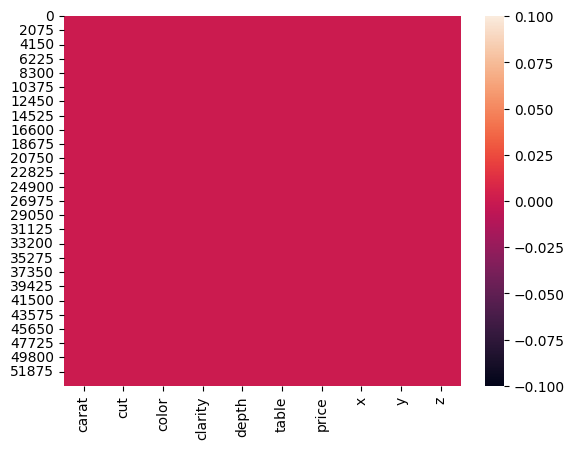

In [35]:
sns.heatmap(df.isnull())

In [36]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Pemahaman data dan Visualisasi Data

# Visualisasi Data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

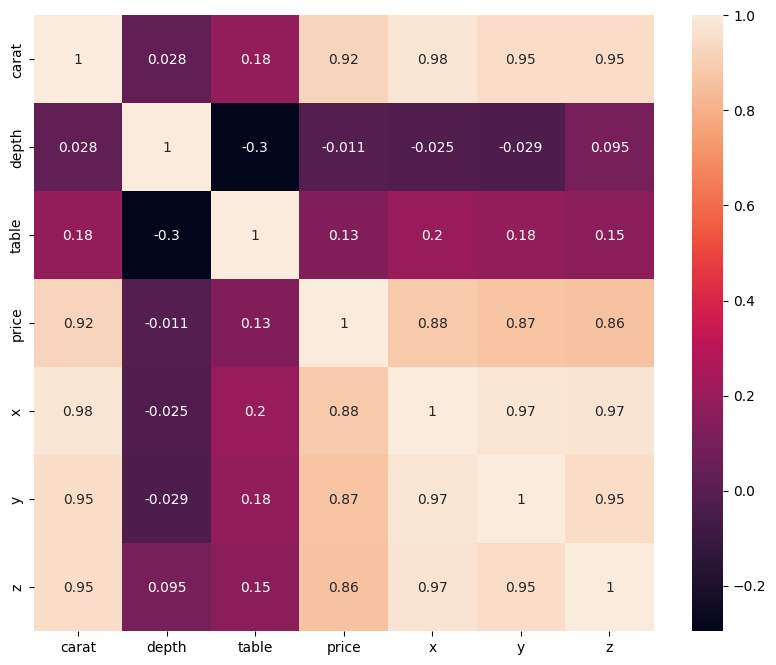

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah berlian berdasarkan carat


In [38]:
diamond = df.groupby('color').count()[['carat']].sort_values(by='carat',ascending=True).reset_index()
diamond = diamond.rename(columns={'carat':'numberOfDiamond'})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'J'),
  Text(1, 0, 'I'),
  Text(2, 0, 'D'),
  Text(3, 0, 'H'),
  Text(4, 0, 'F'),
  Text(5, 0, 'E'),
  Text(6, 0, 'G')])

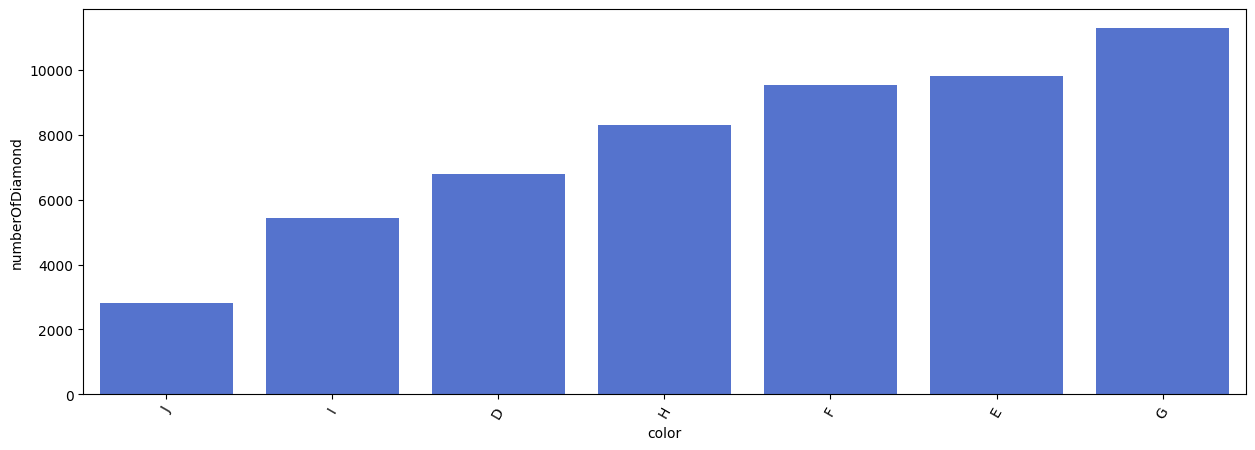

In [39]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=diamond['color'], y=diamond['numberOfDiamond'], color='royalblue')
plt.xticks(rotation=60)

## Distribusi clarity berdasarkan carat


In [40]:
kejelasan = df.groupby('clarity').count()[['carat']].sort_values(by='carat',ascending=True).reset_index()
kejelasan = kejelasan.rename(columns={'carat':'numberOfClarity'})

<Axes: xlabel='clarity', ylabel='numberOfClarity'>

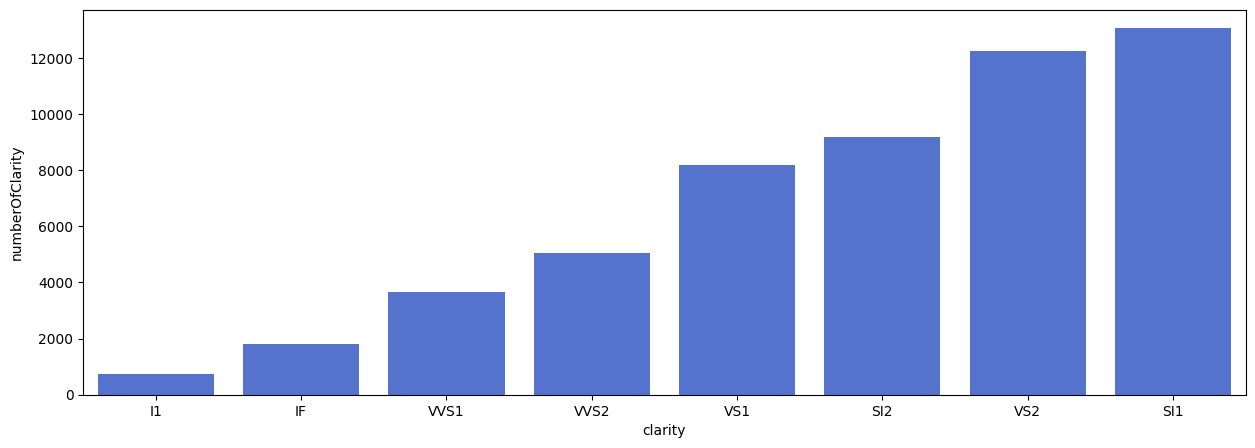

In [41]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=kejelasan['clarity'], y=kejelasan['numberOfClarity'], color='royalblue')

## Distribusi Depth


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\1159298058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depth'])


<Axes: xlabel='depth', ylabel='Density'>

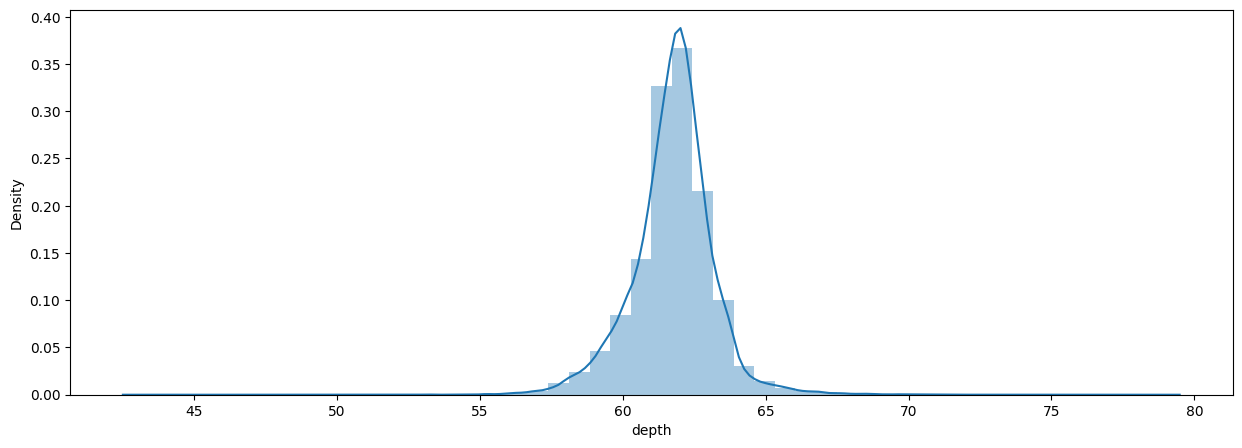

In [42]:
plt.figure(figsize=(15,5))
sns.distplot(df['depth'])

# Distribusi Carat

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\3113382744.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

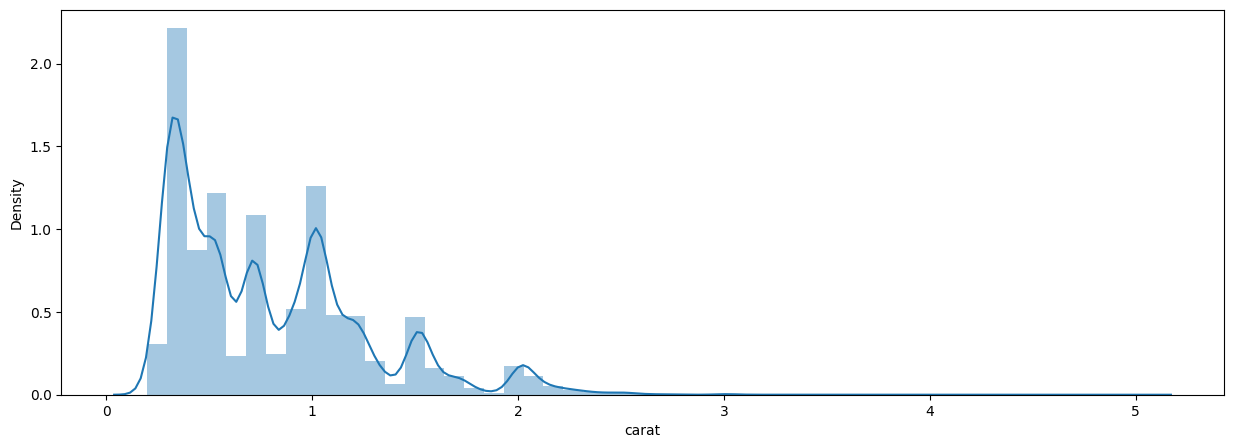

In [43]:
plt.figure(figsize=(15,5))
sns.distplot(df['carat'])

# Distribusi Table

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\1593333031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'])


<Axes: xlabel='table', ylabel='Density'>

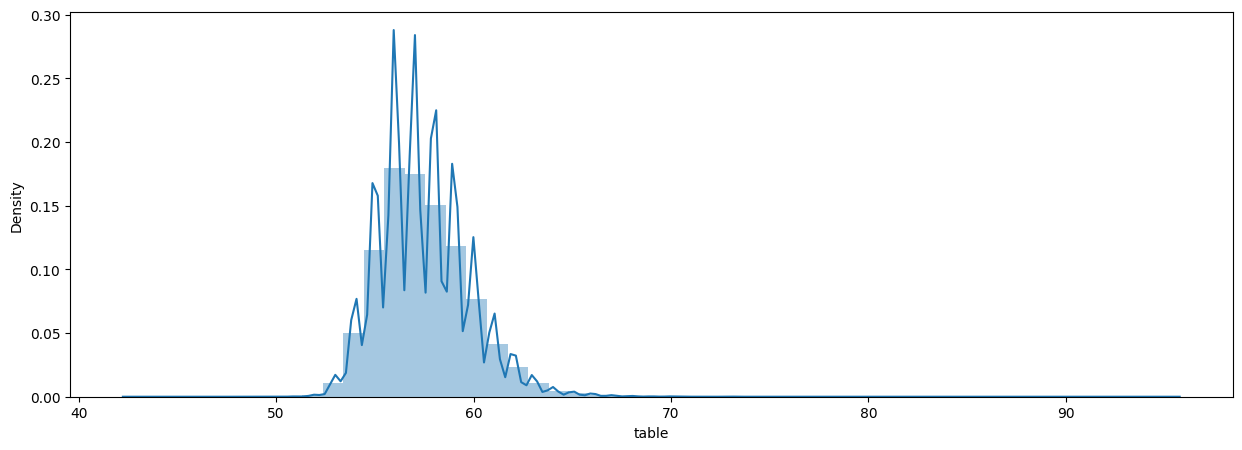

In [44]:
plt.figure(figsize=(15,5))
sns.distplot(df['table'])

# Distribusi Price

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

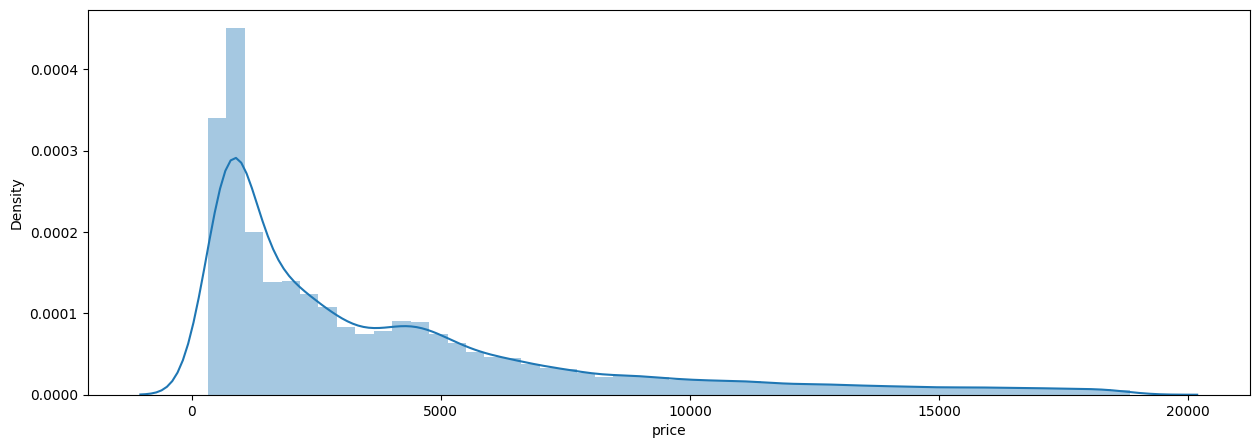

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Distribusi X

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\1571412639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x'])


<Axes: xlabel='x', ylabel='Density'>

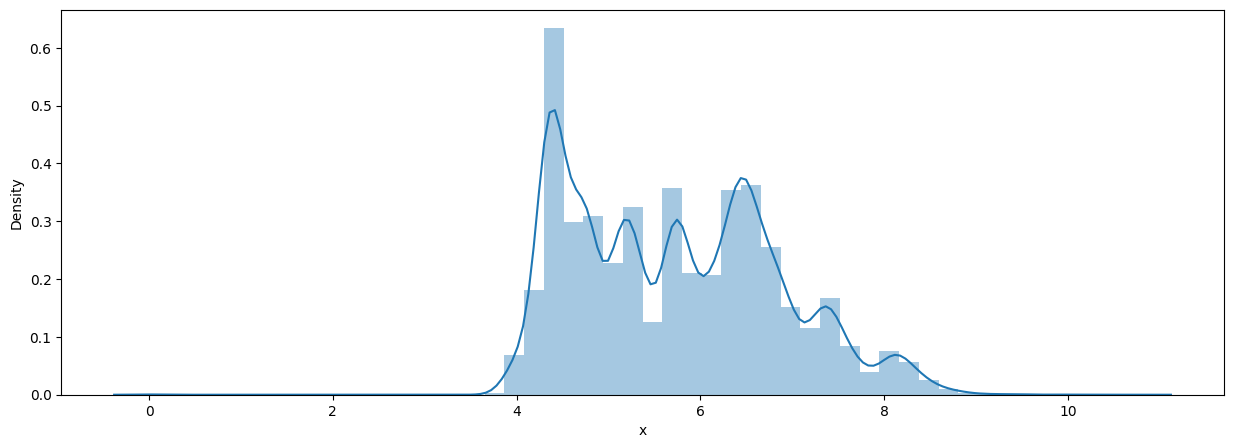

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(df['x'])

# Distribusi Y

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\3012164095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


<Axes: xlabel='y', ylabel='Density'>

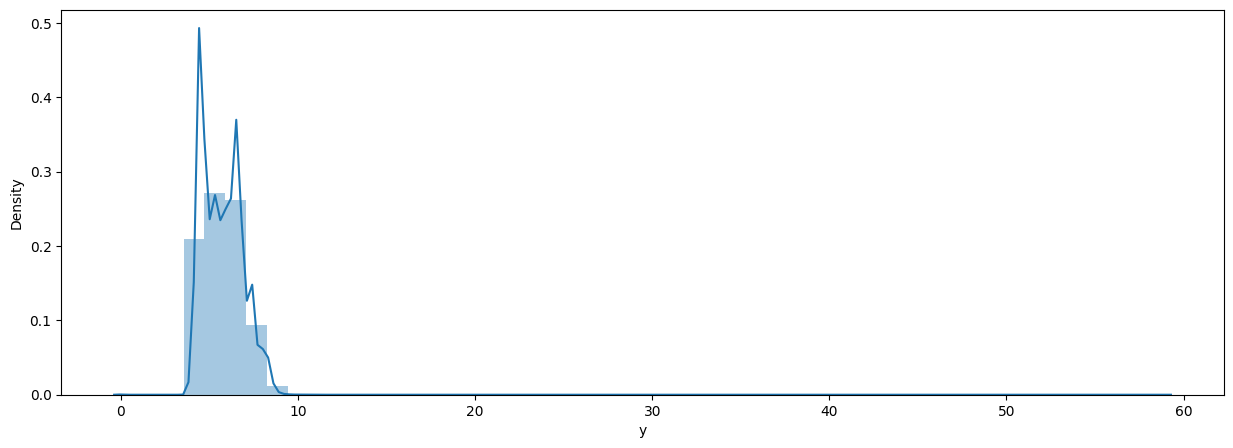

In [47]:
plt.figure(figsize=(15,5))
sns.distplot(df['y'])

# Distribusi Z 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5904\913302946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['z'])


<Axes: xlabel='z', ylabel='Density'>

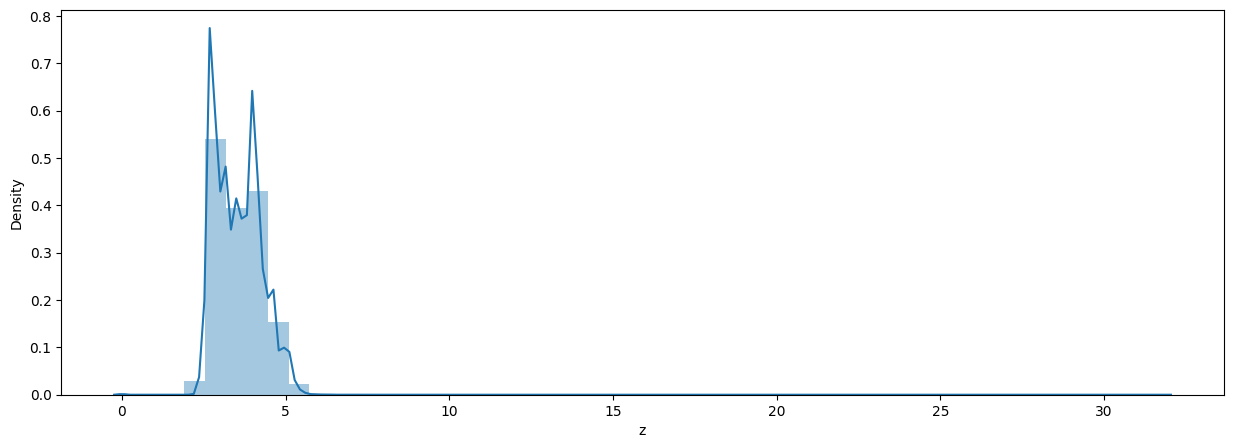

In [48]:
plt.figure(figsize=(15,5))
sns.distplot(df['z'])

## MODELLING DATA

Model yang digunakan dalam penelitian kali ini yaitu Regresi Linier

# Seleksi Fitur

In [49]:
features = ['carat','depth','table','x','y','z']
x = df[features]
y = df['price']
x.shape, y.shape

((53940, 6), (53940,))

# Split Data Training dan Data Testing

In [50]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(13485,)

# Membuat Model Regresi Linier

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

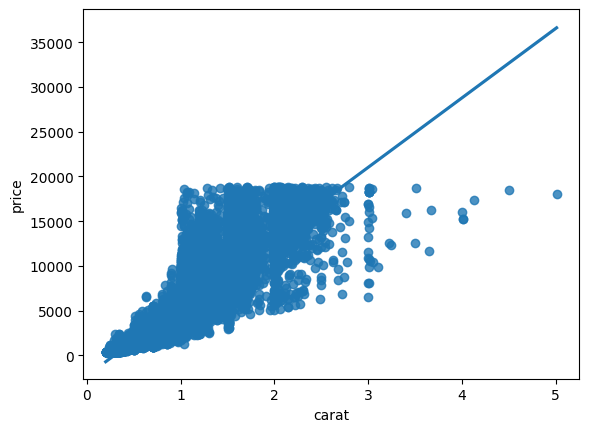

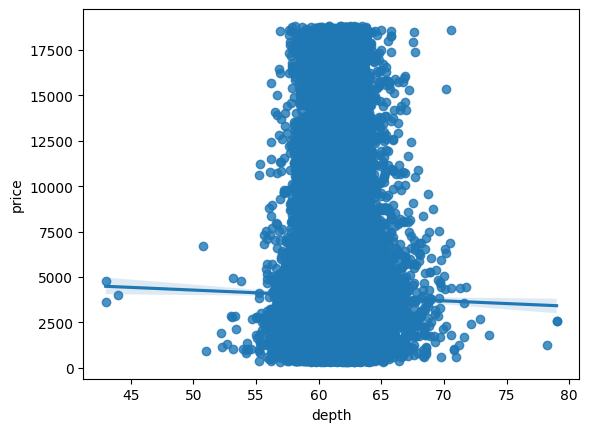

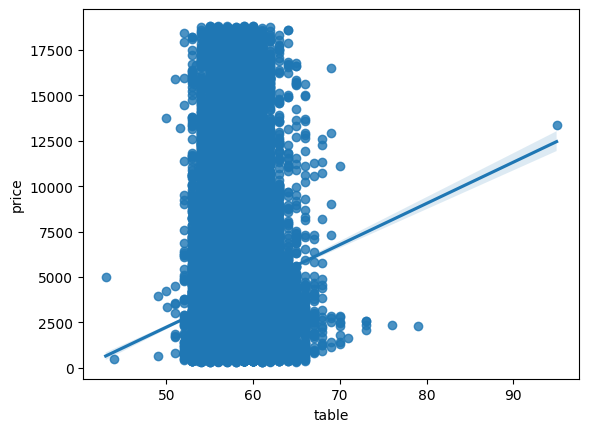

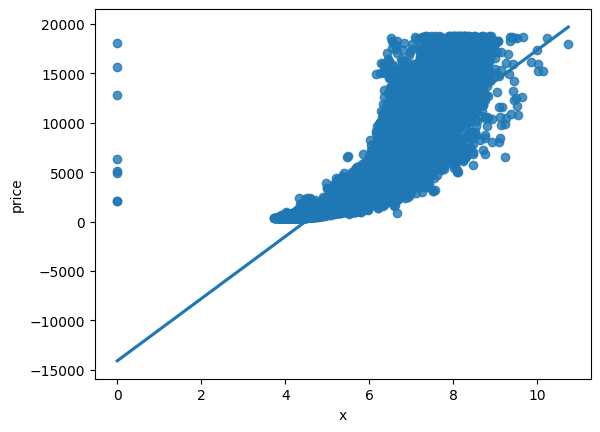

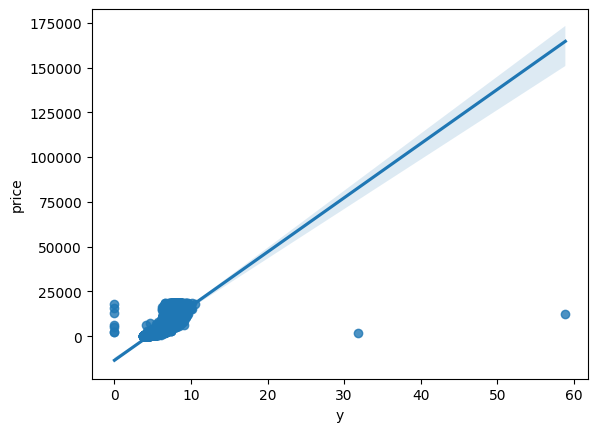

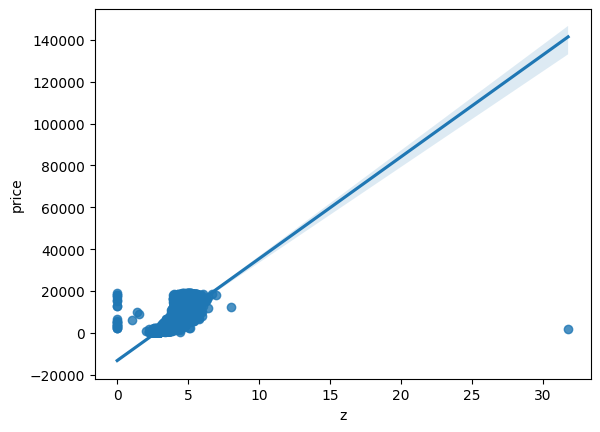

In [52]:
for feature in df:
    if feature == 'price':
        continue
    
    if pd.to_numeric(df[feature], errors='coerce').notnull().all():
        sns.regplot(y=df['price'],x=df[feature].astype(float))
        plt.show()

## EVALUATION DATA

Pada penelitian kali ini, didapat akurasi model regresi linier sebesar 0.8655594888746049, atau kita bisa dianggap sebagai 86,5%. Hal ini membuktikan bahwa akurasi yang telah kita hitung mengenai penelitian estimasi harga berlian cukup akurat. Meskipun masih ada 15% kemungkinan salah dalam perhitungan. Oleh karena itu, perlu dilakukan penelitian lebih lanjut untuk memperbaiki dan meningkatkan akurasi data

In [53]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8655594888746049


# Membuat Inputan Model Regresi Linier

In [54]:
#carat=5, depth=45, table=67, x=354, y=368, z=411
input_data = np.array([[5, 45, 67, 354, 368, 411]])

prediction = lr.predict(input_data)
print('Estimasi harga diamond dalam $ US (Ribu)  :', prediction)

Estimasi harga diamond dalam $ US (Ribu)  : [-348477.07768271]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## DEPLOYMENT

## Save Model

In [30]:
import pickle

filename = 'estimasi_harga_berlian.sav'
pickle.dump(lr,open(filename,'wb'))